In [1]:
import pandas as pd

In [2]:
pairs=pd.read_csv("textreuse.csv")

In [3]:
tm100=pd.read_csv("topic_model.csv")
tm100=tm100.set_index("id")
tm100=tm100.drop(columns="Unnamed: 0").T

In [4]:
tm500=pd.read_csv("topic_model500.csv")
tm500=tm500.set_index("id")
tm500=tm500.drop(columns="Unnamed: 0").T

In [5]:
gte=pd.read_csv("doc_embeddings.csv")
gte=gte.set_index("Unnamed: 0").T
#gte=gte.drop(columns="Unnamed: 0").T

In [6]:
pairs

,Unnamed: 0,0,1,2,3,4
0,0,3e1c9505a30d903050803e6f7bce6c43aa28b517,90cbf3a00d0149a22c333491256c30f9989aa2a8,1,151631,0
1,1,a893fc1cc9fe3fef23ca781b4716cc27dbbea357,eba3053f8fb28a88eb8e4ad13c7beb2d6495743f,1,88812,0
2,2,38e0e2f81b2a472202f6aa0f057382790790331c,bf1b23fcd1cde8cc2b667c72be4ea719f6702266,1,73883,0
3,3,38d503d8ded311c4925aafb6925ef31297b92e66,b56dc685111eb2f59e49e06af8eeccb3031fc88c,1,79442,1
4,4,50966c8fef908e63de15163e894f9b30f2772d90,943846d47dba14d0e9a766f77900870f4f259d5d,1,90294,0
...,...,...,...,...,...,...
21869,21869,1c8ce4181f9441eae34425fe535fc0d93056b5f1,656e8c5f8bced540425c12d854b2911dddefff14,0,131982,0
21870,21870,484f88ade497b19c69134b0bdfe7eaed23dd464a,4ecadbbd3c8d124e90a95f1cd016736dda73afb6,0,219346,0
21871,21871,0b9b4a3ccefef08d8fa96c85f8217b443ebafaa4,72b0bccfab501a8b9b78ac6b9b764dffb6bce169,0,112357,0
21872,21872,25cf3427268d6488da2758c18d8e4f5a04c304e0,6bbe6220c2ca6735dca36aec2917f8096885d63c,0,117455,0


In [7]:
from scipy import spatial

In [8]:
import numpy as np

In [9]:
from numpy import dot
from numpy.linalg import norm

In [10]:
simg=[]
simt=[]
simt5=[]
for i in range(0,len(pairs)):
    g1=pairs["0"][i]
    g2=pairs["1"][i]
    simt.append(1-spatial.distance.cosine(tm100[g1],tm100[g2]))
    simt5.append(1-spatial.distance.cosine(tm500[g1],tm500[g2]))
    simg.append(1-spatial.distance.cosine(gte[g1],gte[g2]))

In [11]:
pairs["gte"]=simg

In [12]:
pairs["tm"]=simt
pairs["tm5"]=simt5

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from scipy.stats import ranksums

In [22]:
import sklearn.metrics as metrics


In [24]:
gcn=pd.read_csv("gcn_full.csv")

In [42]:
a=gcn[gcn["1"]==1]["0"]
b=gcn[gcn["1"]==0]["0"]

In [26]:
a=pairs[pairs["2"]==1]["4"]
b=pairs[pairs["2"]==0]["4"]

In [27]:
a=pairs[pairs["2"]==1]["tm5"]
b=pairs[pairs["2"]==0]["tm5"]

In [28]:
a=pairs[pairs["2"]==1]["gte"]
b=pairs[pairs["2"]==0]["gte"]

In [29]:
from sklearn.metrics import f1_score

In [36]:
t=threshold1[np.argmax(tpr1 - fpr1)]
gcn["pred"]=gcn["0"]>t
gcn["1"]=gcn["1"]>0
f1_score(gcn["1"],gcn["pred"])

0.5439749608763693

In [37]:
pairs

,Unnamed: 0,0,1,2,3,4,gte,tm,tm5
0,0,3e1c9505a30d903050803e6f7bce6c43aa28b517,90cbf3a00d0149a22c333491256c30f9989aa2a8,1,151631,0,0.830454,0.000000,0.000000
1,1,a893fc1cc9fe3fef23ca781b4716cc27dbbea357,eba3053f8fb28a88eb8e4ad13c7beb2d6495743f,1,88812,0,0.816034,0.000000,0.000000
2,2,38e0e2f81b2a472202f6aa0f057382790790331c,bf1b23fcd1cde8cc2b667c72be4ea719f6702266,1,73883,0,0.864944,0.000000,0.009299
3,3,38d503d8ded311c4925aafb6925ef31297b92e66,b56dc685111eb2f59e49e06af8eeccb3031fc88c,1,79442,1,0.948107,0.991692,0.081864
4,4,50966c8fef908e63de15163e894f9b30f2772d90,943846d47dba14d0e9a766f77900870f4f259d5d,1,90294,0,0.853991,0.872723,0.418247
...,...,...,...,...,...,...,...,...,...
21869,21869,1c8ce4181f9441eae34425fe535fc0d93056b5f1,656e8c5f8bced540425c12d854b2911dddefff14,0,131982,0,0.936408,0.897392,0.532204
21870,21870,484f88ade497b19c69134b0bdfe7eaed23dd464a,4ecadbbd3c8d124e90a95f1cd016736dda73afb6,0,219346,0,0.875276,0.061673,0.000748
21871,21871,0b9b4a3ccefef08d8fa96c85f8217b443ebafaa4,72b0bccfab501a8b9b78ac6b9b764dffb6bce169,0,112357,0,0.840499,0.000000,0.000000
21872,21872,25cf3427268d6488da2758c18d8e4f5a04c304e0,6bbe6220c2ca6735dca36aec2917f8096885d63c,0,117455,0,0.852033,0.480178,0.000000


In [38]:
t=threshold3[np.argmax(tpr3 - fpr3)]
f1_score(pairs["2"],pairs["tm5"]>t)

0.4579076298022346

In [39]:
t=threshold2[np.argmax(tpr2 - fpr2)]
f1_score(pairs["2"],pairs["gte"]>t)

0.48430389954495706

In [40]:
t=threshold4[np.argmax(tpr4 - fpr4)]
f1_score(pairs["2"],pairs["4"]>t)

0.16811931047840403

In [34]:
gcn["pred"]

0        True
1        True
2        True
3       False
4        True
        ...  
3623     True
3624    False
3625    False
3626     True
3627    False
Name: pred, Length: 3628, dtype: bool

In [55]:
gcn

,Unnamed: 0,0,1,pred
0,0,0.966434,False,True
1,1,0.938106,True,True
2,2,0.976639,False,True
3,3,0.163066,False,False
4,4,0.833421,True,True
...,...,...,...,...
3623,3623,0.920375,False,True
3624,3624,0.471969,False,False
3625,3625,0.639791,False,False
3626,3626,0.879312,False,True


In [31]:
fpr1, tpr1, threshold1 = metrics.roc_curve(gcn["1"], gcn["0"])
roc_auc1 = metrics.auc(fpr1, tpr1)


In [32]:
fpr2, tpr2, threshold2 = metrics.roc_curve(pairs["2"], pairs["gte"])
roc_auc2 = metrics.auc(fpr2, tpr2)

In [33]:
fpr3, tpr3, threshold3 = metrics.roc_curve(pairs["2"], pairs["tm5"])
roc_auc3 = metrics.auc(fpr3, tpr3)

In [34]:
fpr4, tpr4, threshold4 = metrics.roc_curve(pairs["2"],pairs["4"]+1/pairs["4"].max())
roc_auc4 = metrics.auc(fpr4, tpr4)

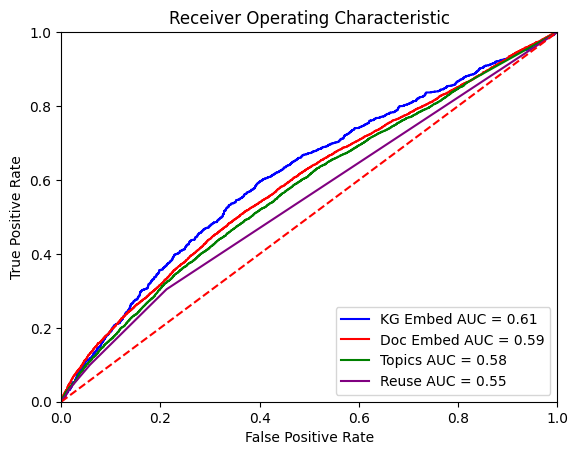

In [35]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'KG Embed AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'Doc Embed AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'g', label = 'Topics AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'purple', label = 'Reuse AUC = %0.2f' % roc_auc4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
ranksums(a,b, alternative='greater')

RanksumsResult(statistic=11.689064061004068, pvalue=7.24877092097124e-32)

Text(0, 0.5, 'Number of text reuse instances detected')

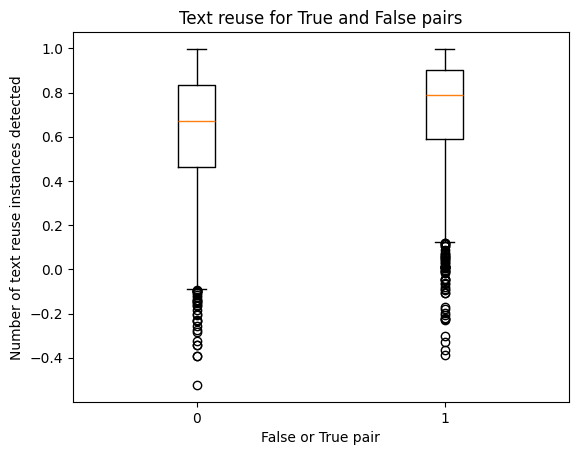

In [44]:
plt.boxplot([a, b], positions=[1,0])
plt.title("Text reuse for True and False pairs")
plt.xlabel("False or True pair")
plt.ylabel("Number of text reuse instances detected")


In [49]:
ranksums( [pairs[pairs["2"]==1]["4"],pairs[pairs["2"]==0]["4"], alternative='greater')

RanksumsResult(statistic=12.028359447825826, pvalue=1.2606036505917809e-33)

{'whiskers': [<matplotlib.lines.Line2D at 0x1db7292d1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1db7292e9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db7292c610>,
 'medians': [<matplotlib.lines.Line2D at 0x1db7292ffd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1db729349d0>,
 'means': []}

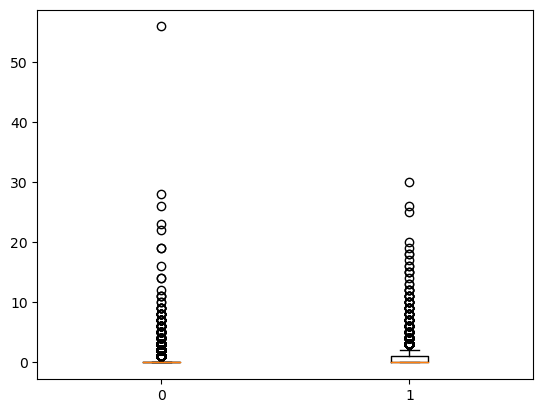

In [54]:
plt.boxplot([pairs[pairs["2"]==1]["4"],pairs[pairs["2"]==0]["4"]], positions=[1,0])

In [42]:
ranksums(pairs[pairs["2"]==1]["tm5"], pairs[pairs["2"]==0]["tm5"], alternative='greater')

RanksumsResult(statistic=19.384606891755052, pvalue=5.2048664199077415e-84)

{'whiskers': [<matplotlib.lines.Line2D at 0x1db70ee26d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1db70ee3950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db70ee1ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x1db70ef4bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1db70eb3050>,
 'means': []}

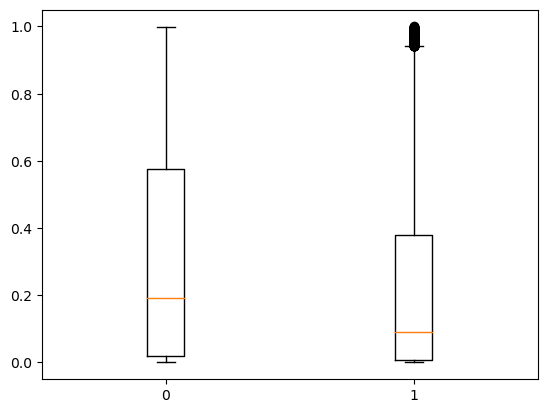

In [43]:
plt.boxplot([pairs[pairs["2"]==1]["tm5"], pairs[pairs["2"]==0]["tm5"]], positions=[0,1])

In [44]:
ranksums(pairs[pairs["2"]==1]["tm"], pairs[pairs["2"]==0]["tm"], alternative='greater')

RanksumsResult(statistic=16.89622822303802, pvalue=2.398108345440871e-64)

{'whiskers': [<matplotlib.lines.Line2D at 0x1db71629f50>,
 'caps': [<matplotlib.lines.Line2D at 0x1db7162b290>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db71628f50>,
 'medians': [<matplotlib.lines.Line2D at 0x1db71638490>,
 'fliers': [<matplotlib.lines.Line2D at 0x1db71638d10>,
 'means': []}

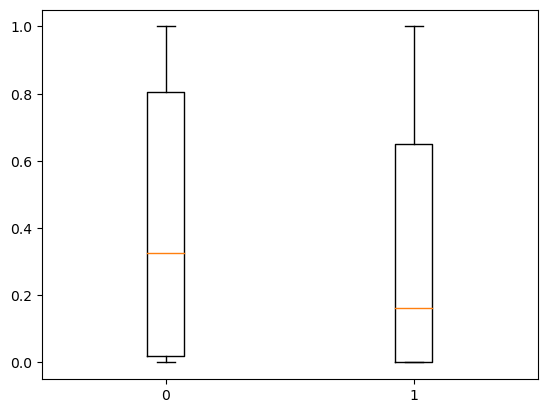

In [45]:
plt.boxplot([pairs[pairs["2"]==1]["tm"], pairs[pairs["2"]==0]["tm"]], positions=[0,1])

In [46]:
ranksums(pairs[pairs["2"]==1]["gte"], pairs[pairs["2"]==0]["gte"], alternative='greater')

RanksumsResult(statistic=22.94947112790876, pvalue=7.457499473575153e-117)

{'whiskers': [<matplotlib.lines.Line2D at 0x1db7169e2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1db7169d250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db7169dad0>,
 'medians': [<matplotlib.lines.Line2D at 0x1db716ac650>,
 'fliers': [<matplotlib.lines.Line2D at 0x1db716acf10>,
 'means': []}

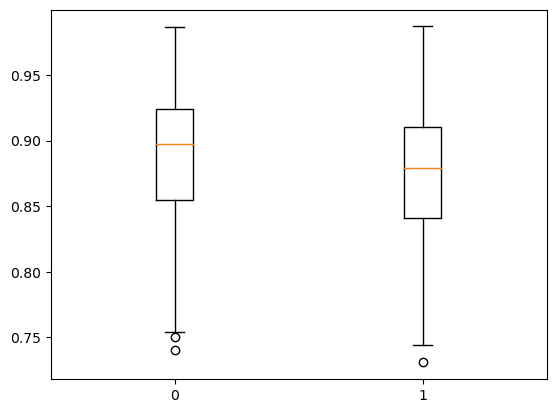

In [47]:
plt.boxplot([pairs[pairs["2"]==1]["gte"], pairs[pairs["2"]==0]["gte"]], positions=[0,1])

In [48]:
sklearn.metrics.mutual_info_score

NameError: name 'sklearn' is not defined

In [49]:
pairs[pairs["2"]==1]["gte"].mean()

0.8894956231947794

In [29]:
pairs[pairs["2"]==0]["gte"].mean()

0.8755345002207542

In [30]:
pairs[pairs["2"]==1]["tm"].mean()

0.4160118721188105

In [31]:
pairs[pairs["2"]==0]["tm"].mean()

0.32668701148489904

In [33]:
pairs[pairs["2"]==1]["tm5"].mean()


0.31825973868336316

In [34]:
pairs[pairs["2"]==0]["tm5"].mean()


0.23090444529535106